In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [67]:
df = pd.read_csv('train.csv')
df.head()

,Date,Hour,CellName,Traffic
0,10/23/2017 0:00,7,Cell_001803,15.13867
1,10/23/2017 0:00,2,Cell_002303,2.05516
2,10/23/2017 0:00,7,Cell_004083,71.55308
3,10/23/2017 0:00,0,Cell_003781,557.98491
4,10/23/2017 0:00,3,Cell_000112,0.98166


In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Hour,CellName,Traffic
0,2017-10-23,7,Cell_001803,15.13867
1,2017-10-23,2,Cell_002303,2.05516
2,2017-10-23,7,Cell_004083,71.55308
3,2017-10-23,0,Cell_003781,557.98491
4,2017-10-23,3,Cell_000112,0.98166


In [69]:
df['DateTime'] = df['Date'] + pd.to_timedelta(df['Hour'], 'h') 
df.tail()

,Date,Hour,CellName,Traffic,DateTime
497539,2018-10-22,23,Cell_004072,2785.69977,2018-10-22 23:00:00
497540,2018-10-22,23,Cell_004073,4270.04041,2018-10-22 23:00:00
497541,2018-10-22,23,Cell_004081,461.19980,2018-10-22 23:00:00
497542,2018-10-22,23,Cell_004082,439.44049,2018-10-22 23:00:00
497543,2018-10-22,23,Cell_004083,331.21805,2018-10-22 23:00:00


In [70]:
data = df.resample('H', on='DateTime').Traffic.sum()

In [71]:
data.head()

DateTime
2017-10-23 00:00:00    2801.87736
2017-10-23 01:00:00    1009.84452
2017-10-23 02:00:00     948.23751
2017-10-23 03:00:00     595.26529
2017-10-23 04:00:00    1694.94013
Freq: H, Name: Traffic, dtype: float64

In [72]:
df.columns

Index(['Date', 'Hour', 'CellName', 'Traffic', 'DateTime'], dtype='object')

In [73]:
df.head()

,Date,Hour,CellName,Traffic,DateTime
0,2017-10-23,7,Cell_001803,15.13867,2017-10-23 07:00:00
1,2017-10-23,2,Cell_002303,2.05516,2017-10-23 02:00:00
2,2017-10-23,7,Cell_004083,71.55308,2017-10-23 07:00:00
3,2017-10-23,0,Cell_003781,557.98491,2017-10-23 00:00:00
4,2017-10-23,3,Cell_000112,0.98166,2017-10-23 03:00:00


In [74]:
print(type(data))
#data = data.values

<class 'pandas.core.series.Series'>


In [75]:
data = data.to_frame()

In [76]:
data.head(10)

,Traffic
DateTime,
2017-10-23 00:00:00,2801.87736
2017-10-23 01:00:00,1009.84452
2017-10-23 02:00:00,948.23751
2017-10-23 03:00:00,595.26529
2017-10-23 04:00:00,1694.94013
2017-10-23 05:00:00,5560.10306
2017-10-23 06:00:00,6752.95067
2017-10-23 07:00:00,8098.13148
2017-10-23 08:00:00,10317.77140


In [77]:
type(data)

pandas.core.frame.DataFrame

In [78]:
dat = data.index
dat = dat.to_frame()

In [79]:
dat['year'] = dat['DateTime'].dt.year
dat['month'] = dat['DateTime'].dt.month
dat['day'] = dat['DateTime'].dt.day
dat['hour'] = dat['DateTime'].dt.hour

In [80]:
dat.head()

,DateTime,year,month,day,hour
DateTime,,,,,
2017-10-23 00:00:00,2017-10-23 00:00:00,2017,10,23,0
2017-10-23 01:00:00,2017-10-23 01:00:00,2017,10,23,1
2017-10-23 02:00:00,2017-10-23 02:00:00,2017,10,23,2
2017-10-23 03:00:00,2017-10-23 03:00:00,2017,10,23,3
2017-10-23 04:00:00,2017-10-23 04:00:00,2017,10,23,4


In [81]:
dat = dat.values
data = data.values

In [82]:
x = dat[:,1:]
y = data
print(x)
print(y)

[[2017 10 23 0]
 [2017 10 23 1]
 [2017 10 23 2]
 ...
 [2018 10 22 21]
 [2018 10 22 22]
 [2018 10 22 23]]
[[  2801.87736]
 [  1009.84452]
 [   948.23751]
 ...
 [107033.24599]
 [ 80354.15856]
 [ 43458.99037]]


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 5)

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train)*100)
print(lr.score(X_val, y_val)*100)

61.95744524392224
63.960704226687696


In [85]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(X_train,y_train)
print(rt.score(X_train, y_train)*100)
print(rt.score(X_val, y_val)*100)

<ipython-input-85-c137807a7fc5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt.fit(X_train,y_train)


99.10730855703996
93.65713592828669


In [86]:
rt.predict(X_val)

array([42980.0360076 , 34175.64905006, 22327.4078457 , ...,
       15233.87469054, 25318.12817626, 82093.47160904])

In [87]:
print(y_val)

[[35910.63239]
 [34868.81387]
 [34909.349  ]
 ...
 [16052.9272 ]
 [25700.61199]
 [47218.26177]]


In [88]:
fr = pd.read_csv('test.csv')
fr.head()

,Date,Hour,CellName,Traffic
0,10/16/2018 0:00,0,Cell_000111,1158.69599
1,10/16/2018 0:00,0,Cell_000112,399.66906
2,10/16/2018 0:00,0,Cell_000113,117.12294
3,10/16/2018 0:00,0,Cell_001791,998.05906
4,10/16/2018 0:00,0,Cell_001792,175.95991


In [89]:
pre = rt.predict(X_val)
print(pre.shape)
pre = pre.reshape(1752,1)
print(pre[0:24])

(1752,)
[[42980.0360076 ]
 [34175.64905006]
 [22327.4078457 ]
 [29744.4371132 ]
 [55079.3060465 ]
 [ 4546.595447  ]
 [15846.94363022]
 [20112.20627034]
 [ 7911.046818  ]
 [44259.90816026]
 [22771.07237402]
 [38606.97592478]
 [ 2319.30570268]
 [ 7110.06971154]
 [26813.4464394 ]
 [37324.78394572]
 [47804.09876718]
 [18808.93205022]
 [ 5099.96779086]
 [ 6458.38476926]
 [35723.98707886]
 [56543.43856344]
 [ 8386.64840824]
 [26693.97053922]]


In [90]:
print(y_val.shape)
y_val = y_val.reshape(1752,1)
print(y_val[24:48])

(1752, 1)
[[ 8594.88156]
 [ 7834.16485]
 [32457.79383]
 [56374.76238]
 [27533.63738]
 [ 8472.18098]
 [41932.4205 ]
 [82847.07301]
 [73163.05417]
 [48122.47385]
 [17957.66489]
 [16153.32573]
 [ 8486.74863]
 [13714.97721]
 [37375.09967]
 [38446.74225]
 [48690.03673]
 [32643.8719 ]
 [10295.93076]
 [48152.8953 ]
 [18458.17827]
 [49062.80662]
 [63225.75485]
 [11108.21719]]


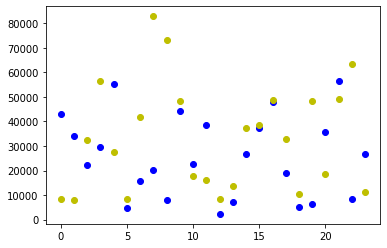

In [91]:
ran = np.arange(24)
plt.scatter(ran,pre[0:24],c = 'b')
plt.scatter(ran,y_val[24:48],c = 'y')
plt.show()

### Very less Correlation between todays and tomorrows data

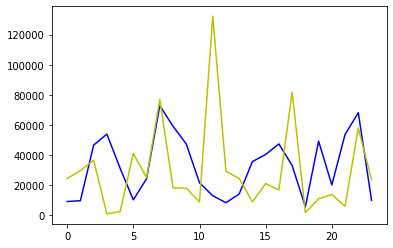

In [92]:
ran = np.arange(24)
plt.plot(ran,pre[24:48],c = 'b')
plt.plot(ran,y_val[48:72],c = 'y')
plt.show()

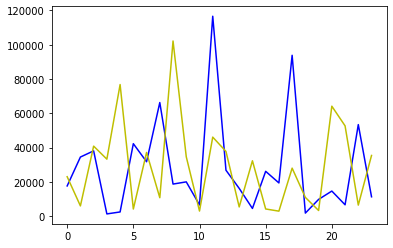

In [93]:
ran = np.arange(24)
plt.plot(ran,pre[48:72],c = 'b')
plt.plot(ran,y_val[72:96],c = 'y')
plt.show()

In [94]:
pred = X_val[0:1728]
act = y_val[24:]
rt.score(pred,act)*100

-90.5951521453154

In [95]:
print(pre)
pre = pre.reshape(1,1752)
pre1 = pre[:,0:1728]
list1 = pre1.tolist()
print(list1)
print(pre1.shape)

[[42980.0360076 ]
 [34175.64905006]
 [22327.4078457 ]
 ...
 [15233.87469054]
 [25318.12817626]
 [82093.47160904]]
[[42980.03600760002, 34175.64905006012, 22327.40784570003, 29744.437113199976, 55079.30604649975, 4546.5954470000115, 15846.94363022003, 20112.206270340095, 7911.046817999999, 44259.90816025987, 22771.072374020034, 38606.97592478007, 2319.3057026799816, 7110.069711540042, 26813.44643939988, 37324.78394572013, 47804.09876718005, 18808.932050219915, 5099.967790860013, 6458.384769260035, 35723.98707886028, 56543.438563439835, 8386.648408239942, 26693.97053922003, 8910.442774959945, 9469.183388140065, 46454.15564423993, 53814.44335318005, 31089.92611946021, 10037.456745779973, 24081.045071219804, 72713.66176730041, 59024.12399976003, 47218.04166374004, 21408.621865739973, 12779.36513922001, 8133.825380979959, 13951.536625660085, 35530.16082171987, 40234.34282362002, 47268.85797159981, 32885.59344141979, 5424.6596244800385, 49117.763887859845, 19977.64611534, 53562.43325750022, 

In [96]:
pre = rt.predict(X_val)

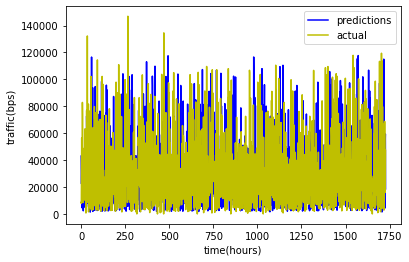

In [98]:
ran = np.arange(1728)
plt.plot(ran,pre[0:1728],c = 'b',label = 'predictions')
plt.plot(ran,y_val[24:1752],c = 'y',label = 'actual')
plt.xlabel("time(hours)")
plt.ylabel("traffic(bps)")
plt.legend()
plt.show()

In [33]:
predi = pre[0:1728]

from sklearn.metrics import confusion_matrix

confusion_matrix(act,predi)
print(results)

ValueError: continuous is not supported

In [34]:
predi = predi.reshape((1728,1))

In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(act,predi))
print('Mean Squared Error:', metrics.mean_squared_error(act,predi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(act,predi)))

Mean Absolute Error: 25372.547190337926
Mean Squared Error: 1135998627.407111
Root Mean Squared Error: 33704.57873059847


In [36]:
p = predi.tolist()
print(p)

[[42980.03600760002], [34175.64905006012], [22327.40784570003], [29744.437113199976], [55079.30604649975], [4546.5954470000115], [15846.94363022003], [20112.206270340095], [7911.046817999999], [44259.90816025987], [22771.072374020034], [38606.97592478007], [2319.3057026799816], [7110.069711540042], [26813.44643939988], [37324.78394572013], [47804.09876718005], [18808.932050219915], [5099.967790860013], [6458.384769260035], [35723.98707886028], [56543.438563439835], [8386.648408239942], [26693.97053922003], [8910.442774959945], [9469.183388140065], [46454.15564423993], [53814.44335318005], [31089.92611946021], [10037.456745779973], [24081.045071219804], [72713.66176730041], [59024.12399976003], [47218.04166374004], [21408.621865739973], [12779.36513922001], [8133.825380979959], [13951.536625660085], [35530.16082171987], [40234.34282362002], [47268.85797159981], [32885.59344141979], [5424.6596244800385], [49117.763887859845], [19977.64611534], [53562.43325750022], [68063.83101496026], [9

In [37]:
print(act)
act = np.array(act)
act.shape
actu = np.reshape(act, -1)
print(actu)
print(actu.shape)
print(predi.shape)

[[ 8594.88156]
 [ 7834.16485]
 [32457.79383]
 ...
 [16052.9272 ]
 [25700.61199]
 [47218.26177]]
[ 8594.88156  7834.16485 32457.79383 ... 16052.9272  25700.61199
 47218.26177]
(1728,)
(1728, 1)


In [38]:
actua = actu.tolist()
#print(actua)

In [39]:
from sklearn.metrics import accuracy_score
#a = [8594.88156, 7834.16485, 32457.793830000002, 56374.76238000001, 27533.63738, 8472.180980000001, 41932.420500000015, 82847.07301000001, 73163.05416999997, 48122.47385000001, 17957.66489, 16153.32573, 8486.74863, 13714.977210000003, 37375.09967000001, 38446.74224999999, 48690.03673000001, 32643.8719, 10295.93076, 48152.89529999999, 18458.17827, 49062.806619999996, 63225.75484999999, 11108.217189999998, 24233.83936, 29544.466609999996, 36423.31672, 676.5705400000002, 2286.7139400000005, 40927.920210000004, 24781.917379999995, 76915.14554, 17998.176180000006, 17787.02297, 8685.94597, 132240.06748, 29021.84586, 24307.128, 8710.847659999998, 20926.875840000004, 16622.88975, 81648.80978000001, 1551.3249900000003, 10764.672009999998, 13525.799350000001, 5739.642680000001, 57774.33948999999, 23490.627970000005, 23035.82971, 6026.62316, 40864.94772, 33270.215339999995, 76756.27326, 4208.3946099999985, 37183.37648, 10800.787899999996, 102144.12985999997, 34650.943929999994, 3028.6188200000006, 46114.391550000015, 37782.77455, 5424.98752, 32331.771069999995, 4241.18265, 2975.44287, 28040.070230000005, 10971.588130000004, 3356.770810000001, 64141.85936000001, 52690.24891, 6494.953619999999, 35423.03057, 43850.82025000002, 6760.38087, 35749.71433, 79766.28696999999, 14705.94701, 19881.71943000001, 22656.681800000002, 52761.492229999996, 5873.387760000001, 6049.1786299999985, 75137.94115000001, 22776.826559999998, 21657.752199999995, 2843.6037799999995, 27748.442509999997, 3983.5913599999994, 20822.554840000004, 25308.01385, 9137.90465, 14308.100390000003, 114436.54174000003, 17204.541140000005, 3034.9006899999995, 41920.882000000005, 10021.33272, 68819.68441999999, 2797.1794200000004, 21491.189959999996, 26834.673790000004, 57157.26632000002, 12726.615890000003, 42718.44019, 38372.29605, 25392.80363, 22073.849580000002, 70162.47174000001, 31782.689010000002, 7275.667330000002, 27610.621139999992, 2003.4502200000004, 29808.570189999995, 24866.928439999996, 29527.84626, 18767.603670000004, 40049.61157999999, 68627.98426, 10814.356920000004, 102171.82107000003, 40527.30928000001, 14628.82972, 51482.675360000016, 96417.23901999996, 20100.33175, 5586.007560000001, 14518.517500000005, 27694.26899, 16313.61746, 2982.8629299999993, 5029.483120000001, 4984.955330000001, 2401.103609999999, 16804.315150000002, 4548.53757, 23849.771920000003, 17047.038699999997, 20935.254599999993, 32722.89711999999, 9364.696389999997, 73388.3958, 58801.075999999994, 15089.014079999995, 6376.22435, 67976.95317999998, 2453.46034, 36916.62866000001, 4322.93902, 61305.175809999986, 18990.160020000003, 27176.451800000013, 15184.111759999996, 19193.19826, 26058.706019999998, 50355.457209999986, 5828.610459999997, 39885.62037, 38225.85024000001, 9598.546849999999, 44173.46323, 78131.50722000003, 20092.096820000002, 41677.62915999998, 26858.702559999994, 9191.641, 24794.829560000002, 10642.901639999998, 5219.72207, 2529.3002800000004, 50339.374669999976, 2663.1447099999996, 2634.0490699999987, 26699.240150000005, 38774.56048999999, 2773.8646499999995, 20231.314990000006, 2894.9801000000007, 8854.019390000003, 11906.5429, 13154.45726, 60467.863590000015, 15527.743300000007, 23149.296740000005, 18914.065400000007, 36914.96677000001, 14761.14091, 42705.98994, 29901.11953, 41201.08279000001, 38922.73922, 21755.482249999997, 12986.15879, 47489.026610000015, 8056.092700000001, 1970.1527900000003, 37361.288810000005, 19356.47097, 14935.826950000002, 97902.45535000003, 24154.76609000001, 57232.68294000001, 30461.353359999986, 3033.78172, 22402.895079999995, 38621.614429999994, 20931.99894, 35831.406169999995, 49443.39045999998, 90068.27875999999, 8164.810300000002, 58539.55229000001, 53176.51916, 36142.907230000004, 110915.15840000001, 37428.440509999986, 69144.34988000002, 36103.372279999996, 4460.594459999999, 45710.68963000001, 44904.99596000001, 52403.967550000016, 88896.94425999997, 4481.163889999999, 44209.457879999994, 16075.791409999998, 35500.63854, 8868.720430000001, 23615.16471000001, 35320.58705, 72329.07469000004, 12904.528610000001, 1452.3322999999998, 3656.4379799999997, 42407.79969, 34184.838169999995, 27487.96974999999, 21046.571669999998, 17607.90492, 49082.368150000024, 28754.885499999993, 40866.71388999999, 5320.502669999999, 17471.19845, 28707.83051, 27248.283049999995, 22963.310099999988, 20544.04586, 14529.986550000001, 25130.340620000003, 99780.59289999999, 28730.25283, 5511.76551, 8086.792240000001, 15371.689890000003, 26745.872349999994, 46997.85641000001, 89083.10529, 20547.466500000002, 42310.91689, 49755.58273000002, 58684.63497, 66393.23932, 79845.36881999997, 8558.095860000001, 19443.661689999997, 146900.78819, 43982.71527999999, 27963.829729999998, 21874.762459999998, 21569.294970000003, 23498.552209999998, 11117.683649999997, 77469.05146, 51384.52300000001, 23161.29361999999, 11040.902540000003, 38023.360380000006, 10589.943850000001, 8442.489559999998, 40630.57502, 20721.938029999998, 39778.502629999995, 3216.31711, 34412.124440000014, 43276.684890000004, 1922.7386400000003, 39760.59126999999, 6358.590370000003, 18968.702010000005, 13810.371040000004, 24477.669940000003, 2426.4011900000005, 3939.0535299999997, 3838.1190500000007, 4411.257780000002, 35783.08701, 7894.333980000002, 60605.99930000001, 18129.601290000006, 44807.91302999999, 11307.143639999998, 32649.53403, 86484.64731, 18744.443149999996, 18030.015310000003, 35054.269550000005, 28797.77047, 7916.919470000003, 37208.63194, 3232.92716, 6587.261969999998, 1497.7259499999996, 41161.983989999986, 31505.716529999998, 19462.873549999993, 25895.458399999996, 0.0, 9559.35714, 32914.717110000005, 22158.806539999998, 3351.9840999999997, 10720.357260000002, 25577.829579999994, 21572.71342, 56938.574980000005, 50753.170909999986, 53493.91789, 70389.14301999999, 37230.10783000001, 86337.04323999997, 44118.5795, 22445.70289, 26385.050130000007, 72642.42474, 20075.100980000003, 29001.36825, 6693.846000000002, 1651.6919999999996, 26702.752649999995, 71778.47289999998, 39763.47940000001, 17663.628869999997, 29449.006049999993, 37375.049269999996, 26734.112739999997, 37712.48878, 9133.4402, 103328.63774999998, 43551.95906, 71216.74038999998, 31766.868720000006, 58050.43015, 27778.789920000003, 37074.99472000001, 3356.1030199999996, 65897.28965000002, 44508.72655, 37290.86406000001, 6557.348170000001, 21925.086989999996, 34523.80777, 16739.39589, 3270.657260000001, 27562.210939999997, 52633.89214999999, 10784.998039999997, 37697.07127, 12498.260490000002, 31445.665710000005, 14255.20661, 39839.03537999999, 4727.980410000003, 68274.76084, 17027.559929999996, 42247.02188999999, 17871.63964, 45243.045440000016, 23118.013539999996, 34818.21358, 3974.965589999999, 94644.76387000001, 96764.2914, 4099.034130000001, 33480.51231, 42457.21856, 11990.65812, 3023.8199399999994, 7792.7015699999965, 15348.06116, 1009.8445199999999, 82224.52480999999, 60794.40942999999, 15425.997090000006, 10222.204880000003, 13316.263780000001, 88770.77019999998, 55844.79487999999, 16589.23513, 24880.131470000004, 18265.499139999996, 10555.51266, 44326.12487000001, 29843.12725000001, 21437.14187, 3768.687160000001, 33900.17274, 61363.49590000002, 37559.47225000001, 23532.57615, 34008.36767999999, 47780.69358000002, 40572.23721, 5814.37625, 43988.78429999999, 17287.339240000005, 14636.061310000001, 28772.85631, 13464.403359999997, 87361.73306000003, 43489.120309999984, 56068.01834999999, 42794.95859999998, 9664.73025, 7510.265880000003, 16003.857290000002, 50911.89735, 40694.21124, 12227.735409999998, 5606.19154, 44068.53245000003, 47582.64453999999, 23211.718920000003, 5931.2239, 0.0, 55685.24480999999, 74623.07097, 46665.87205, 5411.77751, 18930.954530000003, 17463.902349999997, 20763.47117, 38016.78892, 27739.53434000001, 15478.29875, 20602.885189999997, 10459.36068, 43930.97634999999, 14120.50238, 25069.455369999996, 893.6949500000001, 38276.43155000001, 21446.436080000007, 17942.21079, 25888.02292, 27303.702989999998, 1479.3768400000001, 42601.44696999999, 103692.28435999996, 41289.612129999994, 14483.708420000003, 61599.74487, 52949.390879999984, 12943.125680000003, 53389.092059999995, 13374.989759999999, 9934.33822, 14524.294489999998, 19011.924229999997, 0.0, 134536.25383000003, 59129.64715000002, 8337.858130000002, 67119.27978999997, 40965.036739999996, 26521.229990000003, 11337.65098, 12199.20478, 19608.271660000002, 20421.971600000004, 65153.073099999994, 46239.13496, 75240.57359999999, 33629.29728, 14347.338340000002, 26250.639249999997, 44492.44091000001, 20995.125729999996, 22772.992380000007, 2117.1204000000002, 38329.65079999999, 26157.59732, 3429.07232, 42570.54261, 17254.750559999993, 3710.6132399999997, 37008.46428, 97413.48512, 41258.676230000005, 84926.82262, 90171.82092999997, 31173.0862, 1785.0920499999997, 63352.51876999999, 42196.85531, 6251.2528600000005, 52496.99449000001, 26974.478589999995, 44263.93583, 19210.183139999994, 10942.100009999998, 5152.788240000002, 24037.411330000006, 28005.68196000001, 20184.15775, 10039.279100000002, 7507.716720000001, 44433.458300000006, 22677.416950000006, 24205.69380999999, 12705.471969999997, 91215.37973, 15364.180760000001, 9095.085219999995, 72025.12411999998, 14269.710759999998, 104990.71998999998, 24586.60477, 2555.3779800000007, 13134.604429999998, 7541.677389999999, 36566.51413999999, 42631.014090000004, 17146.578869999998, 6534.811080000002, 14503.47801, 1956.6457300000004, 13368.89053, 4545.61416, 68873.70397, 20351.09896000001, 30350.004629999996, 85492.76902000004, 12863.759200000002, 15434.22741, 11205.61142, 43593.77026, 37065.211409999996, 33441.656689999996, 25529.182389999998, 3472.234640000001, 2143.2362800000005, 30668.85017, 3331.3350499999997, 2138.96915, 25446.503639999995, 81825.05381, 49761.188570000006, 25975.118849999984, 6110.029879999998, 17993.6717, 14577.228920000005, 12478.237710000003, 29831.197650000006, 13549.084370000002, 33693.10977999999, 32127.10005000001, 18453.78789, 11104.467399999998, 23174.23087, 12861.991559999997, 6810.3554699999995, 52299.922080000004, 22065.915149999993, 11874.297969999996, 38804.11373999999, 65651.00907999999, 57090.53626000001, 24760.380359999992, 10956.255320000002, 26232.926259999997, 58181.13413, 54458.380229999995, 45922.427180000006, 29932.67066, 28619.219940000003, 44665.24565, 28113.061340000004, 11598.665820000004, 8298.56526, 39313.19229, 31228.594210000007, 34863.38393000001, 36855.61847999998, 3180.3152499999987, 9351.693059999998, 5839.132999999999, 53214.38470000001, 44283.869259999985, 30824.14855999999, 8638.77028, 42463.59815, 14201.871770000003, 17038.884009999998, 26116.448399999994, 45458.80379, 1794.9411300000002, 15014.682330000001, 36814.708199999994, 9646.427390000003, 22006.221120000002, 1889.06837, 2893.37382, 75241.54503999997, 2720.0914499999994, 37430.13782, 10346.967790000002, 86183.46874999999, 8350.6299, 103474.90974, 33817.905060000005, 2686.3986299999997, 15878.559389999997, 2926.779740000001, 37681.989239999995, 6218.058560000002, 52628.536140000004, 96646.45415, 20447.135639999997, 24752.20156999999, 13686.233849999999, 25829.66646, 19147.373410000004, 36671.22649999999, 19748.53268, 77722.87926999998, 20774.92274, 45851.25109, 48748.727620000005, 70169.71187999999, 4815.024979999999, 32587.714510000005, 14207.655529999996, 6919.1454300000005, 3192.017590000001, 27112.97359000001, 27002.17012, 53935.81763000001, 42587.50912999999, 8670.755680000002, 5273.065729999999, 83177.44912999998, 6138.96314, 21584.195460000006, 7558.324309999999, 40773.397280000005, 10846.607049999999, 54393.176739999995, 56464.43317, 20179.831049999997, 0.0, 22755.241510000003, 47979.33334, 39507.747469999995, 12893.055780000002, 105202.60903999998, 28858.339869999996, 3695.51417, 44210.12693999999, 13623.856969999999, 95997.88579, 28780.866299999994, 15865.952710000001, 22302.384419999995, 62012.19264000001, 13133.49839, 4160.2653900000005, 8595.880330000002, 27209.235600000004, 41876.78575, 35018.55634, 50735.388539999985, 8588.786599999998, 42667.337139999996, 13342.016939999998, 14369.657269999998, 13274.695329999997, 19862.49383, 63128.52762000003, 41092.86609999998, 25478.542740000004, 8312.207840000001, 23217.530130000003, 11581.721759999997, 33829.00655, 72037.75698000002, 910.2613799999999, 12036.565380000002, 7282.78551, 5642.579840000001, 24140.599849999995, 12667.90689, 45653.181329999985, 91374.96704999998, 37009.84332, 14739.959580000002, 12900.408489999998, 3114.963510000001, 33426.72865, 49859.94873, 21945.53321, 5382.749199999999, 30352.777650000004, 109571.29622, 16393.11527, 31600.706669999996, 6530.259690000003, 3939.00285, 43255.80877999999, 27306.715419999986, 13877.089829999999, 29308.471470000004, 5240.344850000001, 18622.770930000002, 29591.117460000005, 16381.478499999994, 35478.81126, 33625.7917, 13709.508839999999, 79288.9358, 74959.48628000003, 52091.88423, 22735.081000000002, 18151.57001, 18367.569390000004, 24300.185009999997, 22776.52455, 15537.402330000004, 32218.502430000008, 67955.45894999999, 38237.53181, 56461.73178999998, 2601.211890000001, 681.5980699999999, 15147.864130000002, 107131.15503999998, 26729.733149999996, 43935.04312999999, 89878.70755, 36666.871819999986, 24097.266179999995, 43844.50311, 31657.915860000012, 35857.43696, 37571.164189999996, 24377.100029999998, 27923.935150000005, 38968.87928000001, 25397.81362, 1144.8567199999998, 4241.882759999999, 24413.45425, 22996.023580000005, 10500.23034, 9366.354730000001, 16596.57183, 29350.184939999992, 13517.226360000002, 59961.18679999999, 12299.096540000002, 107155.29127999999, 19947.69692, 3019.041570000001, 85245.75849, 3791.8707000000004, 12408.49923, 9044.184160000003, 82949.09260999999, 7728.924849999999, 39946.16922, 8523.205980000002, 46062.29223999999, 35348.012200000005, 11556.701040000002, 4387.711180000001, 13764.054899999997, 37132.94311000001, 27272.982440000007, 47954.828030000004, 28938.707320000005, 36238.957239999996, 35863.65168999999, 85801.38699999997, 12380.72901, 27980.230370000005, 14345.108190000006, 25118.084300000002, 41530.28130000001, 73343.07707999999, 14458.85655, 72411.65225, 53447.52196, 27812.922989999995, 34345.05841, 59239.69528000001, 11358.608390000001, 15126.883510000001, 28201.489319999997, 15562.402380000007, 16443.08172, 40236.230359999994, 48224.80627999999, 19284.257519999996, 60513.46705, 16003.697410000002, 35071.37702999999, 31477.832209999997, 24661.439339999997, 7264.475389999998, 2355.96851, 28365.880100000006, 23634.088379999997, 25198.456969999996, 45002.56901999999, 26225.896600000004, 63206.538209999984, 5659.426529999999, 3324.290710000001, 5230.957019999998, 16600.970130000005, 7667.469229999999, 45811.277649999975, 40146.99675000001, 39558.62628, 14486.623649999998, 13145.364930000005, 107956.10070999998, 45392.56367000001, 87060.81092000003, 37557.16289000001, 10301.922140000002, 34680.18245000001, 91029.45689000002, 80288.22001000002, 14130.78371, 90517.53674000003, 31442.784209999994, 10560.34731, 9371.08499, 41418.69667, 0.0, 61948.026379999996, 16553.96177, 99427.63229000001, 42405.86067999998, 38410.80057000001, 12074.89634, 44561.33281000001, 12763.25171, 13313.981220000001, 11936.09298, 29935.78772, 14814.81709, 35047.01196999999, 9707.07099, 4608.81637, 37852.12181000001, 23606.00291999999, 12612.9555, 39923.16421, 22262.65567, 33841.44816999999, 21023.474909999994, 5733.543210000001, 4857.172009999998, 4389.44211, 52753.259430000006, 13867.263539999996, 9628.69216, 29030.762369999997, 1860.9024100000006, 2691.1822, 16269.488849999998, 71853.62672000001, 13634.737750000002, 33972.07371, 28715.842460000003, 31266.62651, 16713.120270000007, 34170.33617000001, 4990.37279, 19868.459069999997, 10773.902189999999, 29478.77964, 47936.08988000001, 52275.99336000001, 12786.445370000001, 46936.47033000001, 4549.5893000000015, 5610.26537, 7015.25704, 2636.2872500000003, 8986.07346, 49318.56537000001, 7832.820849999999, 32887.630450000004, 18284.476290000002, 51463.3497, 55828.98671000001, 61065.72465, 5513.561079999999, 12277.697950000003, 48052.107249999994, 4020.5080200000007, 6997.9169600000005, 5267.48152, 3956.0518499999994, 27682.439929999993, 20488.923619999998, 49943.057069999995, 15552.325439999997, 47162.61499999998, 42319.19310000001, 12644.49024, 38165.06496000001, 8098.131480000001, 40190.813310000005, 4049.66926, 51794.63912, 30040.89444000001, 52583.00988, 3402.0917800000007, 50658.68463000001, 18065.31148, 72519.51720000002, 10706.088950000005, 29485.84254000001, 1530.7877699999997, 20088.733549999997, 50793.05078999999, 23642.656819999997, 44779.9964, 3229.258109999999, 10752.56252, 6091.87043, 15802.692479999998, 545.7839799999999, 15432.325990000003, 35104.072380000005, 5458.25213, 43982.31631, 16269.729749999995, 4511.0562, 26418.359910000003, 2302.74001, 37494.328429999994, 106754.47920999999, 104728.42199000002, 35899.40978, 21251.454679999995, 1790.56698, 22306.793059999993, 86115.29046, 3715.203150000001, 53579.68117999999, 6124.009799999999, 7999.009929999997, 9600.530679999998, 41687.70455, 28183.103120000003, 8154.917589999998, 21135.974919999997, 28583.50633, 43724.10882999999, 50327.58108999997, 36872.741890000005, 34995.29535, 24334.34019999999, 80966.94978, 43579.50389, 4466.04914, 22123.263350000005, 8849.870959999998, 44483.933710000005, 4410.256039999999, 41672.04285, 32351.29204, 31885.68304000001, 6989.569310000001, 17887.472450000005, 4166.92487, 35541.22014999999, 39695.85171999999, 19036.524469999993, 44695.340979999986, 1818.4401599999997, 44407.92495999999, 48861.78177, 5065.69992, 17550.73891, 15579.72225, 16499.089899999995, 66807.0862, 97893.51644, 47519.64732, 19240.328309999994, 88024.24140000001, 22410.466420000004, 64702.294890000005, 31397.23424, 47640.05945000001, 14407.326509999997, 36970.973560000006, 16884.8648, 4883.18307, 8989.632709999998, 69494.11406, 103630.63800000004, 31019.401879999994, 12405.264709999998, 32859.72189000001, 31571.14401, 10423.37527, 80473.07034999998, 44469.986959999995, 21481.763580000006, 41694.31099000001, 76521.10106999999, 23125.564789999997, 37097.4002, 24970.775210000007, 41698.213579999996, 14362.79376, 14608.897389999996, 0.0, 8175.343080000001, 56952.30911000002, 34998.99423999999, 14767.270589999998, 6410.34019, 24228.283919999998, 21021.949070000006, 11835.312609999992, 26431.124359999998, 34119.88854, 28636.024509999996, 22212.402570000002, 21402.24655999999, 1189.1510999999998, 23669.308479999996, 27289.94056, 75349.45734000001, 4696.714849999998, 15536.46252, 28930.710600000002, 73260.05287999997, 10074.530970000003, 56048.70409, 18183.690219999993, 41935.72727000001, 76377.39618999998, 12142.91795, 12846.855919999998, 2302.6371400000007, 24776.03588, 35771.32121, 11499.9979, 4769.193489999999, 37494.61759, 29392.596909999993, 41407.11131999999, 64305.67253, 70739.34804000001, 3613.2955299999985, 27666.753110000005, 2808.2507399999995, 15123.553699999995, 26898.615079999992, 35967.61373999999, 13831.779810000002, 15331.039070000006, 84308.24811999999, 44119.91382999999, 91064.96958, 19128.781290000006, 29975.9416, 14550.082870000002, 16085.52926, 71862.04840999999, 12093.042250000002, 71833.28707000002, 32235.54329, 32883.139019999995, 17176.775119999995, 65573.81055999998, 14699.737300000004, 9924.38621, 28082.28801, 47832.47437, 49815.65151, 33425.550650000005, 13499.536939999996, 39974.28232, 50545.86212999999, 26006.192980000003, 110515.61196999997, 13695.47502, 63759.27887999998, 4556.82693, 25943.051959999993, 6780.853470000001, 33447.884959999996, 3440.1730400000006, 8086.677929999998, 11542.819260000002, 49065.85657, 73302.74943000001, 31689.805639999995, 23892.012020000002, 5044.098779999998, 68869.08653, 58418.03870000001, 100620.99140999997, 99757.16085000003, 4053.1711600000012, 13584.087950000001, 38560.88061, 51400.53157, 35307.7611, 44795.49709000001, 50713.62398999999, 7273.224590000002, 27279.94785, 47177.99316, 65630.2681, 67927.76088, 23465.778980000003, 6563.55094, 5029.108259999999, 16581.640860000003, 36451.230509999994, 38622.540239999995, 1507.1181, 10320.918520000003, 6029.08859, 11324.666439999999, 44915.16411999998, 713.1405100000001, 21917.380910000003, 4140.062459999999, 47176.24753000001, 25641.55394, 8032.389299999999, 82855.64712000001, 22268.707799999996, 18580.974589999998, 16505.542569999998, 17722.707090000004, 17668.69520000001, 5942.19921, 42612.60984000001, 60798.71725999999, 3791.58949, 49713.63309, 8753.08721, 6701.423230000003, 2873.60455, 3013.2973499999994, 22450.5531, 38750.23553, 32288.376020000007, 41995.57591999999, 7705.220020000001, 24310.804630000002, 19438.56415, 18529.770769999992, 33285.87047000001, 20098.2294, 34534.45932999998, 36959.37395999999, 4890.931919999998, 12156.484170000003, 26795.29441, 3554.2426899999987, 26587.580309999994, 16965.56126, 19591.94936999999, 40922.39351, 20842.77473, 11861.969250000004, 3925.8882700000004, 16083.346990000004, 99703.82974000003, 17443.947459999996, 34344.43864000001, 55141.24319999999, 40099.36791999999, 14241.574399999998, 12064.59858, 24754.86182, 3133.1741000000006, 91347.9565, 45330.895500000006, 14780.420179999997, 24461.803050000002, 2232.17089, 10358.821829999999, 66049.42707999998, 41619.28211000001, 65808.25738999998, 49119.19991999999, 24273.23291, 3120.6199300000007, 12140.79488, 28926.485179999996, 4705.610600000001, 45776.39923, 40735.83874, 3948.4810800000005, 39937.12407, 4474.359880000001, 17156.6284, 33423.01861, 29626.063759999997, 6622.588229999999, 37853.425480000005, 28709.87195, 10965.6075, 13372.117800000002, 28574.960359999994, 33802.77347, 34851.994610000016, 52839.557740000004, 1603.4627999999998, 4903.93331, 2166.2127999999993, 14558.763770000001, 76163.46565, 56659.48050999998, 18241.31816000001, 13937.62689, 36428.857630000006, 27937.52166999999, 20359.785329999995, 21427.019809999998, 3461.2961599999994, 60454.92835999999, 7545.5512, 19209.882149999998, 32995.90375, 37852.8417, 5268.7989800000005, 28165.938660000007, 44917.065749999994, 31743.261919999997, 88509.69062999997, 22228.85543, 24658.80869, 13996.493219999998, 69883.99498999999, 9762.416609999997, 33628.65703000001, 38762.737219999995, 8486.865379999997, 13901.745550000001, 23924.95324000001, 30292.290330000003, 42369.265000000014, 24144.143620000006, 23691.29552, 44089.49817, 2034.7209799999998, 33273.48815, 2935.3637500000004, 9284.999680000003, 12803.189890000005, 37779.51152, 5571.340090000003, 65292.932059999985, 3207.1221900000005, 29957.487609999996, 22447.931370000002, 58259.83417999998, 15937.320130000002, 8603.846149999998, 8322.661050000002, 16837.572030000003, 14460.450349999994, 39029.99169, 16658.12674, 7694.6933199999985, 7583.557960000002, 37763.01250000001, 7247.91073, 61437.58574, 33614.409629999995, 52008.76222999999, 55578.716420000004, 72585.86061999999, 33453.24669000001, 24267.12977, 13784.88095, 23593.502819999994, 15806.024169999997, 45427.20408999999, 37475.90127, 45648.487939999985, 4822.869459999998, 46166.30323000002, 5061.878629999999, 11539.819939999998, 23074.643290000004, 69258.40473, 15209.074500000006, 17204.89996, 2629.7367100000006, 28571.122620000002, 5960.346139999999, 2570.1687600000005, 52494.87953999999, 106673.30652999997, 28072.295309999998, 32451.630999999998, 41034.77561999999, 2005.82562, 30749.832420000006, 10042.0192, 45401.08109, 26926.638329999998, 13572.221850000002, 49664.96301999999, 48978.239609999975, 11499.765790000001, 59817.503670000006, 8443.49386, 10408.216370000002, 6979.651639999999, 30880.232000000007, 37915.61120999999, 7735.433939999999, 32119.400110000006, 8230.229299999999, 7348.509720000001, 7051.51382, 7437.92581, 35281.67302, 8822.073620000001, 45856.745429999995, 5023.272149999999, 13046.003399999996, 4062.3053700000005, 4753.012959999999, 4531.749239999999, 30763.46627, 29375.371049999998, 25175.880970000006, 12153.223070000005, 3941.4826399999997, 32771.99496000001, 12352.351639999999, 21605.1127, 13246.85654, 27431.745820000007, 14651.995080000004, 7962.224860000002, 9771.122520000003, 25077.044289999998, 18184.43174, 84006.56910000002, 35656.591, 29901.066020000002, 23131.452970000002, 10759.109230000002, 19700.204380000003, 14989.129750000004, 33562.751959999994, 39368.205689999995, 4413.129350000001, 17186.60424, 11031.43264, 35162.82493999999, 5062.860269999999, 49166.697779999995, 51025.26486, 5371.0159, 12456.30223, 26836.051750000002, 108692.82398000003, 18062.919019999998, 12309.96879, 6544.617920000001, 103364.52331000002, 34835.50490999999, 49100.61499999998, 41576.623790000005, 4001.8600899999997, 28964.519409999997, 15638.617320000001, 81113.33567999999, 2782.008609999999, 7883.93499, 109513.85404, 38755.3488, 44526.58202999999, 24597.254880000004, 33212.3804, 49762.337590000025, 46855.35827, 8349.33054, 39377.366030000005, 51058.58114999999, 12964.420480000004, 44260.16225999999, 9522.95528, 15667.148139999994, 3383.83288, 16856.433210000003, 44377.17521, 38803.34051000001, 4731.93546, 64286.67764000002, 58220.56218, 35000.39580999999, 70530.52589, 7264.216989999997, 57405.42484000002, 14930.885620000001, 101608.34618999998, 33707.308119999994, 2505.7470700000003, 85259.55820000001, 37386.94706, 11217.774370000003, 41485.19208, 15469.114170000003, 81796.67602000001, 18758.329130000006, 3619.5863200000003, 82211.38925999995, 42691.30993, 12251.043179999999, 33248.16195, 36724.591589999996, 99483.29316999996, 22163.747059999994, 81580.31462000003, 5626.776010000002, 7392.425879999997, 104181.9923, 24879.303930000002, 35551.80262, 44041.10939, 41481.21740999998, 102291.49182000001, 16106.194, 27633.504979999994, 46412.71154000001, 54911.343890000004, 23016.85395999999, 52635.688429999995, 74655.38242, 12893.712390000004, 51351.52862, 25951.49162, 9100.96674, 24036.822040000003, 27659.734349999995, 67004.9959, 4594.311830000001, 25301.423270000003, 37413.34235000001, 12301.950630000003, 39085.160019999996, 37460.692939999986, 27978.049129999996, 11749.091309999996, 18016.062739999998, 44559.02680999998, 31483.476170000005, 18532.308869999997, 2246.47121, 18162.994249999996, 17487.349980000003, 48960.069820000004, 43613.177599999995, 16198.811450000003, 62057.608030000025, 68210.52126000004, 32810.60940000001, 41646.80231, 6897.808930000001, 29114.99039999999, 37077.61769, 24707.591589999996, 6707.494359999998, 38511.37743, 10321.386930000002, 26360.926089999997, 21568.110330000003, 27503.58543, 100825.36122, 18584.244749999998, 47013.08400000001, 56705.75875999999, 36867.03952999999, 13721.315430000002, 9837.594959999999, 21177.333939999997, 2606.39939, 8894.5617, 34688.69268999999, 38661.57101000002, 50776.61118, 9066.18472, 16041.241329999999, 92798.14514000002, 25818.487169999997, 39745.5287, 20598.917929999996, 24976.861019999997, 70428.7737, 18986.090019999996, 34818.66246000001, 25375.132499999996, 4238.73785, 68820.02489, 8279.98163, 93226.21747999998, 10628.5425, 8285.88185, 53945.823889999985, 41375.617679999996, 26379.468550000012, 20256.964669999998, 10874.61291, 13788.666549999998, 40209.936850000006, 11646.26231, 20105.448029999996, 2622.1092800000006, 36198.339210000006, 24817.09224, 4935.96072, 35861.019140000004, 117850.71703999994, 57275.83760999999, 30207.37319999999, 65070.54978999998, 10056.983429999998, 108661.98304, 32151.81275999999, 4483.513769999999, 22434.96489999999, 34358.15556, 26060.11482, 41014.57591, 13640.47852, 7691.625199999996, 18731.101959999996, 14962.943359999997, 2907.71338, 85999.93102, 37210.42548000001, 27550.90375, 34054.50883, 29406.163950000002, 9640.51161, 56030.522899999996, 55125.31375999999, 19017.256150000005, 4122.269349999999, 14077.23365, 18911.65025, 21756.68118, 36260.336129999996, 100349.04024999995, 42800.32546000001, 15281.65406, 19977.32495, 30295.898209999996, 2668.95231, 55140.81993999999, 25968.54218, 8459.66005, 28946.96334, 4852.09267, 39023.464940000005, 31143.306650000002, 30932.50898, 17396.787379999998, 20210.60406999999, 77758.02275999999, 32983.00923999999, 29412.714030000003, 81300.49767, 31174.9038, 37826.12378999999, 4091.5713600000004, 24001.53582, 37199.43071, 41011.33636, 10579.092999999997, 73437.90679000001, 3584.1875999999993, 74795.72775999998, 41172.48133000003, 31357.91798, 23482.43494, 83171.66703, 9815.084129999997, 32826.25677000001, 15465.908249999997, 28329.271409999998, 58287.02589000001, 91820.43405, 44072.60511999999, 85635.54611999998, 32698.324359999995, 4420.70262, 3583.63709, 11913.269919999997, 14293.129119999998, 23316.254719999997, 33996.517830000004, 18257.95718, 39188.48995, 15113.458350000003, 78169.82309, 45292.79407, 12210.234950000004, 7707.031870000003, 35346.90426, 14406.863910000002, 30057.713349999995, 16599.603799999997, 41572.89425, 18467.072189999995, 37833.77267, 9414.374820000005, 5693.84153, 17650.402939999996, 70585.83789, 11808.71387, 21253.627550000005, 63249.44563, 2388.7008799999994, 19979.9945, 18833.801789999998, 16807.27611, 28186.005879999997, 15641.271670000002, 12823.385560000002, 8598.765840000002, 0.0, 11177.078709999994, 6892.40248, 12340.430349999995, 5124.778340000001, 11882.17353, 9304.009569999998, 26843.949470000003, 15825.381940000001, 59662.64503999999, 51728.29026, 16013.13348, 79705.27814000001, 35272.90269, 4212.00536, 35966.15714999999, 5647.10768, 98641.31498999998, 6580.725120000001, 6252.030660000001, 51158.288279999986, 54219.85738999999, 17863.44864, 31243.556839999997, 54118.50412, 14320.647379999997, 84876.21858999997, 23347.014739999995, 28294.214050000002, 46208.35622999998, 11063.156570000003, 938.50865, 36307.870409999996, 1307.5818400000005, 17198.850029999998, 21234.772220000003, 45655.753430000004, 9474.674589999999, 5052.604219999999, 47402.82530000001, 38443.262240000004, 113383.03750999998, 31742.669029999983, 41051.15195999999, 29008.88728, 7144.210320000001, 6707.476160000001, 1612.2012000000002, 6235.1651200000015, 46136.56485999999, 66978.26196, 19942.35315, 119416.54525, 31815.677, 113704.96465000001, 4339.337149999999, 17388.627950000002, 44712.176550000004, 79719.51306000001, 4526.78063, 33442.11545, 66849.29641, 20551.755349999996, 59984.32072, 6933.142889999999, 35169.97748, 2855.0611100000006, 3819.31647, 17184.142969999997, 32639.890880000006, 68749.09660999998, 41534.81387, 37372.79002000001, 16052.927200000002, 25700.611989999994, 47218.26177000001]
#b = [42980.03600760002, 34175.64905006012, 22327.40784570003, 29744.437113199976, 55079.30604649975, 4546.5954470000115, 15846.94363022003, 20112.206270340095, 7911.046817999999, 44259.90816025987, 22771.072374020034, 38606.97592478007, 2319.3057026799816, 7110.069711540042, 26813.44643939988, 37324.78394572013, 47804.09876718005, 18808.932050219915, 5099.967790860013, 6458.384769260035, 35723.98707886028, 56543.438563439835, 8386.648408239942, 26693.97053922003, 8910.442774959945, 9469.183388140065, 46454.15564423993, 53814.44335318005, 31089.92611946021, 10037.456745779973, 24081.045071219804, 72713.66176730041, 59024.12399976003, 47218.04166374004, 21408.621865739973, 12779.36513922001, 8133.825380979959, 13951.536625660085, 35530.16082171987, 40234.34282362002, 47268.85797159981, 32885.59344141979, 5424.6596244800385, 49117.763887859845, 19977.64611534, 53562.43325750022, 68063.83101496026, 9786.550886780013, 17663.730724400088, 34498.40688888011, 38109.514676400024, 1358.1784779599968, 2503.347807299999, 42284.55744827978, 31762.967328340223, 66266.02052461989, 18751.827358259936, 20031.559410559992, 6603.105524219962, 116562.89951493914, 26825.7415109598, 16244.627371639937, 4552.704437180016, 26179.46641378007, 19423.828517639995, 93805.48775322012, 1843.4485364599857, 9814.604219920013, 14676.702301520058, 6681.898798459993, 53407.86311955992, 11337.53820881999, 27602.838758360234, 6440.402535479977, 28346.36720318003, 34725.05750228009, 70586.40357945987, 2732.541838739992, 42703.1293914401, 11149.947793460022, 94628.22940881978, 36386.18960783985, 3804.968728300003, 45545.78505625997, 42599.9693656597, 5921.091816820007, 31322.128660340062, 3511.5175726399975, 5029.709468960026, 35648.397205540045, 15327.465557720016, 2536.6418834, 60548.44927901994, 37913.84076028018, 6339.264071180015, 42071.21005274004, 46107.84802468022, 6631.883844759992, 25308.058759979962, 73908.6958961599, 17193.168740479978, 11585.220185140004, 27057.450997339958, 51955.023433180315, 5855.584777660019, 9960.726787800048, 76303.76707795972, 20813.40134683995, 21337.66408017993, 3316.7500214799943, 44207.798485980114, 2622.831460359996, 21643.136713399952, 34081.571183780005, 9372.595858699982, 14758.60413856004, 98456.5164627, 18047.58625180015, 2030.1532209000056, 41391.221996379914, 12132.972651639924, 62924.94768842035, 2531.9817508000115, 16973.699745459973, 26499.428894940043, 53876.35892472009, 17499.22525668, 40035.74996395989, 42695.39027712002, 30975.462818560096, 22260.669868779954, 73140.29923195962, 29120.397440039967, 12488.140985119942, 31355.971001300117, 2143.8978826599932, 20327.415403000054, 29718.07024454005, 31972.063284799904, 23105.508681959993, 41300.96817501983, 74823.50118359984, 13883.47229957999, 95690.94860979982, 42055.21039866003, 10438.446914300044, 62866.082296119974, 92131.89088974005, 17777.576745820013, 8385.447574340023, 12205.088330540018, 24652.71317810008, 19080.99532863997, 2235.2161833399987, 2592.802932540002, 3217.727763580014, 2589.0895982599977, 19376.577418879984, 3865.860905660019, 21053.975470720055, 18354.13942618, 16871.954148739904, 22311.032146659883, 9884.448596699987, 65454.985963140294, 65146.077803720036, 17146.823430979977, 4154.331123960005, 56442.01968477999, 4178.612834600012, 36737.08939227987, 5046.199300259975, 55861.93288426013, 16132.414483300068, 23397.265369140143, 17049.654343660135, 24332.17138231993, 16677.226616460153, 36325.642315099765, 7647.279980639966, 37627.191573640164, 38448.64810276003, 16378.461132040044, 27048.19594345993, 87279.21017572023, 16882.456268000104, 36883.28035901997, 18358.62708195994, 12183.991206679955, 25080.953995659984, 6549.973125619954, 9083.008936879974, 2481.870674940004, 45969.5514098401, 5750.423270399983, 3598.374726100021, 24303.08011793999, 40944.89156691999, 2402.6731821600015, 14617.880722280017, 4069.8696594399794, 9514.212854120018, 12398.901180440058, 14536.618698559902, 34929.65074612003, 15949.477185000042, 23248.4741566801, 22042.929230160058, 38157.23766613993, 18643.986786139998, 46228.28388075983, 31883.102271759897, 41924.55989360005, 44093.82664878002, 19953.961983219917, 13296.281844759938, 65940.19539884005, 12273.182031980059, 2870.84080943998, 39485.97145361971, 20484.202578019962, 12510.543630599926, 84410.07731327967, 34867.828291840146, 48374.149684820324, 28563.35842029995, 4687.322646459977, 23130.0220761799, 41458.49650979982, 22706.138698259976, 35834.29869209999, 55676.64159129961, 89136.36258248037, 5403.568405000021, 50749.566306620014, 49564.728077479944, 25653.56650058007, 104107.6184079396, 23881.860417279964, 68600.87453067998, 34399.28119467996, 7055.472761499987, 45335.674970960026, 44759.30013231983, 42804.26470906021, 95088.90447513982, 3657.846846459977, 30373.411793340136, 15637.529148099977, 40903.850200279914, 9793.910685559948, 25447.00947565991, 44823.594779140054, 37840.37940284009, 14957.711521460018, 2073.516973300011, 5120.61889822, 33117.50570993992, 37886.015125519974, 38244.16148829994, 20387.022121239937, 17632.119944800084, 48113.93317608007, 26898.173204679973, 46266.48473839997, 5653.376069340025, 16438.703603320093, 30979.649805080164, 33943.51945450014, 22294.700507699952, 24813.194284320092, 15600.334801979941, 15301.745431920008, 102080.97127723988, 32619.45621192019, 3280.8438177599915, 5310.063256160014, 15529.902883179968, 32654.157052340128, 47336.8624791, 65537.23125224019, 22901.220371759948, 45171.99291198029, 43361.79178772005, 46946.58568209999, 46861.36021347999, 92213.89371549987, 15006.819817759973, 23610.537800539958, 103413.6203535607, 47176.37255187984, 17773.067238600055, 24371.759294639935, 17398.16333922004, 27472.96059041995, 13807.048614499965, 81289.87128533993, 51048.1327992801, 23482.679062560077, 13146.028610579984, 40573.75201506019, 10798.589500959972, 6897.37427178004, 38193.7695608401, 21299.358963539984, 35283.882740080044, 3407.1694244999894, 38164.34896826012, 43271.53739940015, 3554.0542008999696, 26755.61346781991, 3448.6176069800217, 26126.606921779974, 24806.15370076002, 18609.90630276001, 3893.5694415599887, 5094.683718540017, 3903.9606946200206, 2525.2359458200067, 43442.03925481986, 10075.683450839957, 65162.693758960464, 18478.37988723992, 44547.53138998004, 13936.499027479991, 25653.757642779987, 76950.86182034017, 20375.973995839966, 14448.346400699982, 30578.499959879842, 26386.66129443997, 6611.796833539967, 19999.71389515996, 2853.96013866, 7028.544140700016, 1750.81819695999, 36708.28078159996, 41145.39632439993, 22618.570462200063, 20319.711486699936, 25469.7117743401, 10854.165089699965, 40902.62217553995, 22204.735849879955, 3463.5444768199977, 7843.3883778399695, 33628.70726831973, 20767.12030509999, 35637.72078043998, 62163.93905798038, 53912.65813866023, 59095.47600637981, 40333.2170179799, 89224.71409348011, 45021.21443034013, 19698.593916179954, 25389.352836760056, 63714.61442055971, 21037.674284320034, 34548.48371126014, 6475.995947920029, 3185.7898938999965, 24492.774536140132, 79960.04290872019, 40367.638284720095, 23904.913934999873, 20858.76213691987, 39576.52652717995, 20499.62082199994, 40522.064887740016, 11563.106810959924, 113076.55930245956, 27982.405538099993, 75135.63736766009, 32481.598655499874, 47181.69447445972, 35178.69610057998, 40050.476972919976, 4742.622991140015, 64957.78671620025, 45369.16178610004, 38521.81779314002, 7214.166925700024, 23590.19183487998, 33008.23199352005, 19257.830743199967, 4349.10388870001, 30359.26043052008, 41369.13274331994, 10832.044783580008, 40205.18082225988, 16512.800018900012, 36358.434477960036, 15267.527356140037, 44670.29494459992, 6151.554757439999, 73258.05474205954, 18056.199553720013, 43972.21124759963, 16095.385292919964, 48602.00256770015, 26237.770880480082, 24017.49304059994, 3974.910686779995, 102378.02228167934, 95182.03712942029, 5052.235897639974, 20195.512761559985, 38951.406251279965, 13507.657760819955, 2855.9949828999934, 7309.712334000052, 20193.160537180076, 2879.5885567600117, 77858.87284894024, 67033.58454486029, 18239.114168839867, 7768.424659739963, 13947.825405059963, 109779.89315918017, 42521.28867428017, 18478.78230266001, 26609.74722518001, 21368.187818340022, 9661.612887919977, 44883.82846003975, 24389.148429000066, 24027.04059772009, 1894.173135700002, 18312.73981062003, 58040.74335099968, 36223.81637677998, 20896.43672180004, 27273.628667380195, 50017.27170652012, 40959.27806381999, 5827.368347340009, 42042.45678596003, 14754.696205999964, 12104.466149880018, 27824.88944899995, 6488.567316640007, 83833.6412457799, 46048.18321679972, 58939.674947960004, 49390.22428027972, 9543.847407439984, 6334.465989300053, 18898.64132260007, 52341.13091618011, 37665.62257693984, 11598.261615079991, 5535.04842252, 45355.30267659982, 51001.94631359997, 21668.11867432005, 8341.133302720034, 20367.63093436015, 48592.29104607989, 68504.1448812595, 35125.64887068005, 10455.874588519951, 20353.35568987986, 16359.978685999899, 18864.057683199964, 40521.07308742012, 27643.942401840006, 19132.135645980106, 24480.682157540075, 10181.682039120045, 44627.30083438015, 15737.748791900014, 26158.907765999884, 2298.8349402399967, 35866.64883732006, 17397.642177699945, 21293.49059198004, 20744.64264032003, 29011.41679052, 3660.3479780000166, 35833.4018067199, 102093.22111825952, 38211.667455859926, 14987.356661820082, 55631.85303966024, 48509.5468611399, 12027.938531859969, 49547.910563280035, 9621.582498199974, 10948.945596779988, 17899.902338659962, 12617.263388399964, 18912.955342459903, 117504.21821548001, 51798.0053931999, 10961.236763739977, 56626.260324839976, 34187.248923439896, 34942.77748658012, 12680.32099372002, 9544.102084579928, 10342.313171279935, 21128.745578479982, 65181.166044099606, 49329.972625480266, 71999.46360882005, 34938.8331189199, 13957.824894800013, 26752.618711999996, 39043.14575227997, 23185.903888499986, 21752.320565659982, 1945.5484493199979, 36169.30401231992, 25157.69666689996, 3154.816215280008, 33201.24617812033, 5139.231808240001, 4782.491064, 38308.10629189993, 88898.64989557987, 34735.23532014, 86361.14033550063, 74904.96482812036, 40452.91638594015, 2931.0702024000034, 72745.02483360024, 38993.13967667992, 4406.175805920019, 36358.94466192007, 33505.79182947978, 41912.822069079906, 18236.662068499965, 9256.532593219998, 9084.909529659986, 21836.71065080013, 40485.25999572006, 19980.62800856009, 13354.34352274002, 8872.962605559997, 41044.26079626006, 25748.19927872006, 21067.886460259917, 13195.656728720016, 78569.15247663972, 14227.09958216007, 11170.19581443999, 66538.48887697945, 14701.257150659898, 103958.18585470018, 31005.720081160092, 2939.0353904800068, 13182.174426140005, 8837.487686519979, 40428.43765137996, 35890.54750483988, 15879.001514720023, 8059.51364053995, 13744.822143719937, 2597.129434359985, 13686.205139799948, 2400.7744194199995, 78819.71433435984, 21856.994808640116, 30641.626443080204, 95457.5164196204, 16658.82345746005, 17805.693130200063, 7878.737722300006, 48909.99569071978, 24608.90798274006, 32047.5969206798, 23898.00109096006, 4359.250018199983, 3459.3435013000044, 35473.5714430398, 4406.373641219974, 2018.0413158199972, 17094.525721640148, 83856.75485759985, 46241.18175012028, 21521.981902740044, 7607.779379239983, 19551.478439259954, 19480.715549079985, 15447.594185919907, 31355.154234399884, 12653.065181760083, 27727.390372780093, 34826.833965659855, 20791.859026259965, 9833.126400860037, 22792.214341520084, 15635.70886861998, 5464.043314280003, 52799.05973816011, 19773.465236419986, 14649.157206879985, 44396.378702920025, 61304.8676497605, 58756.289265660205, 25439.84345990014, 9237.441078079954, 21009.570583059965, 81592.24527529944, 52837.06998377989, 39096.40627210006, 26804.98318327997, 30523.660765460005, 44538.55241925988, 23279.019619219933, 10963.295081200005, 9860.45181241996, 42304.354285900095, 32481.2299593999, 29288.358111480073, 38366.749807519926, 5048.893137059969, 7716.846154400059, 6253.544221819977, 48704.021754319925, 47158.9056069, 34576.9379621202, 7983.8559165800125, 45368.248368719906, 14563.000313680108, 17629.712503999974, 24870.97324155987, 36264.16533008018, 2151.980754959992, 16703.08756999999, 25305.105442880023, 11208.020172560051, 26798.026079779916, 2489.728203600002, 2947.0554221000066, 58746.47274611987, 3297.889425520004, 37703.91333605996, 12551.532953740041, 68425.9121340598, 11945.610180079997, 96860.2115745201, 36694.48473124007, 7299.575401460009, 16827.47603742006, 3065.257899860019, 42344.67548611995, 5748.257035059983, 52812.00658995971, 84792.19789753991, 20614.686493739962, 28440.687954000008, 16546.567509140037, 16935.154829819894, 17099.177800540107, 46464.14460404003, 22000.005544960073, 76585.43734631981, 20434.865594839906, 40011.60575980007, 52062.544838560156, 79503.34300520037, 3751.481351179995, 31781.31437019975, 13783.778062599991, 9428.433130779993, 1812.014387140001, 28704.398967419995, 25384.225776500094, 36292.85139810009, 41473.17252388007, 9296.681379099968, 7426.735912739988, 81547.20631007935, 7190.7717277000165, 20348.194038740057, 9759.840857599984, 44211.548366719864, 9234.01812937998, 48816.68190230002, 75349.26052174019, 15161.942272160099, 5715.337052660002, 17182.20353968002, 42780.09718098026, 45616.55875877989, 14469.316263339928, 107282.30007945985, 23345.10940600009, 3326.0145403599986, 36522.76229087992, 19260.065817100025, 81269.55047637997, 26597.232958300112, 14337.276828379941, 24375.067620079833, 64402.89188875966, 15917.037208779917, 3840.9125742600086, 6123.451079599971, 24319.182117480035, 27865.993111779877, 38126.48040897985, 58226.52850290033, 15461.640811620064, 45831.74274563986, 16434.879644959958, 14368.454551000037, 12102.633224059979, 11884.418995720034, 56782.15849125995, 41598.310107060024, 20961.899526880054, 5848.102162860015, 24540.867689920135, 12865.80069664006, 38653.73915473976, 81068.06014470039, 2289.49010183999, 15219.262132219914, 7859.984927079955, 6084.750524100003, 28923.020648539914, 14150.088848439953, 45613.65604254007, 91128.07370187964, 37963.64119605997, 13061.340803820032, 16120.25372353998, 3339.463323059991, 43467.303025060035, 46804.10848793991, 17744.019457579958, 7489.842516559959, 41093.91483695987, 104311.01046277978, 17796.899002379996, 19933.10574272002, 7690.947344320066, 2727.181848259993, 45189.52423521989, 25425.893842699956, 15957.52443050007, 26011.68772619991, 12545.66003737996, 17442.874659380046, 27850.703690920207, 17724.917180659988, 45685.27584411999, 48287.92234761999, 15602.49840577999, 75825.11616756019, 74887.02111505966, 50739.7390031799, 25061.533395159917, 14603.650782599985, 20716.911184260036, 24794.072140420132, 22010.057964120027, 16204.901289959904, 25441.75137543992, 61878.51282627988, 44062.07006861998, 47989.689855919874, 2920.0396217800167, 2530.8361442199985, 13508.746375380026, 106890.71059884067, 19206.340894740028, 38198.313959560175, 79151.68164567977, 45997.70330108001, 21895.116662920052, 47488.45339482002, 19082.464224460055, 42775.25981434003, 42064.46232936024, 29560.241975160185, 29647.660232800114, 41206.7288420201, 12461.434268600045, 2559.5388350399967, 4602.214329579987, 12367.218775600018, 24099.735079539925, 9515.355825039987, 9236.749188080004, 11668.523310839983, 26444.168685419878, 15483.562017860044, 58174.91440510028, 11875.301078759976, 104502.03540311956, 21595.783881799925, 5298.6228629400075, 80172.23184482049, 4145.659987740017, 13235.323497519994, 8334.876388279976, 71053.41212143964, 6579.540932459959, 39647.69190755996, 10868.716914440061, 41951.012565940146, 38800.602229899916, 12595.578519659897, 5248.460673199989, 12267.016036679994, 37334.34973232001, 23192.22310856004, 47682.80485198027, 29794.726406259964, 30540.104271099815, 38275.59483939993, 81968.6065445206, 15452.715784420016, 29413.137526239916, 16423.547684580062, 24933.038507240035, 37485.77476937994, 77526.6119230401, 14841.987754739876, 56009.607042460215, 52049.70662888006, 36009.98188608021, 31644.239878759927, 53456.45506573984, 7276.837690159989, 15377.546304400035, 28536.294426200053, 23003.934614260073, 13424.691382019966, 38696.37175908015, 47808.94475773996, 23728.605982559886, 58643.810594640345, 19740.766151459997, 30517.071301899876, 37009.43878601997, 20554.868142000025, 7418.133611879954, 2658.704723980008, 33976.051481179966, 26970.181223479856, 22973.909524420218, 47929.910413700105, 26762.21791619997, 74039.64445483981, 5226.04036782, 6368.425698360029, 6206.072930319979, 13682.785518380115, 6434.59737655995, 39301.91626728002, 47099.87161872026, 42617.447887359864, 11610.120352080005, 10554.659329000022, 88158.88488118006, 44964.40510523982, 56266.2494030004, 36331.98275822012, 12178.817354740066, 32679.983824080173, 102374.41299061957, 53963.779600620095, 14780.783944859942, 87400.58858882064, 26165.22120242013, 14376.230843459969, 11360.284995780037, 44136.95336475993, 2982.2750406599966, 48314.15922434005, 15868.694061920041, 101742.26139541951, 42808.449387179695, 36011.68609251997, 17474.612124740026, 43374.05486145987, 13008.610502880027, 13800.74753117996, 5515.948019140035, 37631.81141242029, 13197.584066979913, 36025.448746579896, 8622.347503600044, 6313.106827259989, 39238.975264759996, 29763.431401520083, 15944.29614853998, 45918.062707479876, 26170.080823399832, 35250.23122732004, 27334.858079679983, 8916.301591459956, 6400.256548679966, 5426.53357700002, 55358.67151747991, 13575.381468280064, 8625.337750940018, 29154.67328720017, 2980.6606920800054, 2370.7100610400003, 11810.126128639991, 78798.47890826031, 14182.67143318001, 30376.32334360001, 24303.47514676009, 26373.955500539974, 17488.866444240015, 29959.319127880095, 2778.938037980002, 24484.09727171992, 11573.151746480056, 31184.558312560115, 50966.805923280226, 46020.665225379926, 19403.434485219932, 50753.97121238013, 5224.860872919979, 5488.397995280031, 7627.8570141399705, 3838.309305959992, 7663.466707740025, 33829.59621928019, 10901.957894660061, 41862.54021682004, 18313.619045500094, 58010.97484488026, 47320.0197533198, 34816.03276280016, 5592.7916633599825, 10159.50535743997, 49792.55008198003, 4539.76146395999, 5738.571972760029, 7949.081597879977, 4012.037542859997, 32690.098250460105, 22548.915338679843, 49027.87129888012, 18133.787627639995, 40944.53369271999, 40216.27349181981, 15098.012379679996, 43042.16405455988, 9053.98836789997, 37749.991217179966, 4499.24167453998, 46616.84536016005, 28310.797060159945, 48823.967630159925, 3534.790071260024, 46948.60820164024, 20481.57460707999, 68536.52895827981, 16217.111857039983, 41794.43763253989, 2142.946345700004, 20013.053102580016, 51820.467339639785, 22065.725189899902, 51291.3403441197, 2561.550789899994, 12230.254917940021, 5679.557893979997, 17482.515155980094, 2293.0658393999965, 13890.083812140068, 31941.275697600133, 6687.387542459972, 44563.02790819999, 16492.82056672001, 6055.990615459992, 24208.188456679854, 3935.2234830600087, 41246.93128451986, 116624.70167217951, 103127.58675817949, 40299.4100633799, 18300.466041479965, 2580.252295220011, 20971.22800491996, 86602.05522915993, 3328.164327779997, 47550.48861117997, 4991.284968859996, 11504.431849999995, 11022.086268080006, 41952.71420863985, 42530.46090100001, 9818.66040077994, 19115.89167321989, 34441.378854359806, 44356.40850015987, 38818.11838479992, 36504.2117599199, 36094.0314737199, 21099.79129916002, 80471.38934004048, 43771.96553491981, 5455.270477059991, 20852.018506419936, 9412.066275700035, 54811.27674988018, 2603.8672780799934, 34242.18117424004, 36221.142138799965, 25377.607533299994, 9897.527127539997, 21356.538979759975, 2530.122698000003, 41796.06444073989, 45090.40771718017, 20269.863970160033, 46779.27288072005, 1854.982145079994, 38962.81389793981, 56457.2324311799, 6637.847546999993, 20639.988142639995, 15635.872924839932, 14930.790017240033, 70761.57559874022, 107952.2383621797, 54297.011017280216, 27310.562041519785, 81310.70839186068, 31643.660077779918, 68375.01013152048, 30901.60483251975, 41057.033179739934, 11027.298736699971, 44354.07019071982, 15317.374329339924, 5092.997323580006, 7869.538932019984, 74589.38191728013, 96024.99636571963, 25415.352327460107, 9316.188355780028, 38680.593506060126, 22766.734576299837, 7306.067706359983, 75951.36258539987, 44434.52320366024, 20321.706510460022, 40885.47148473984, 80093.02896880014, 20749.77521414005, 36770.78002921999, 26232.925775340067, 45139.17205056011, 17502.36787285999, 16771.37793992008, 37993.75187164013, 15946.713288160034, 53859.946386000185, 37484.21579174004, 13102.731269559958, 8613.789752560011, 24458.048184580097, 26366.282228700107, 16292.060889619957, 32435.342438039876, 33457.03683600006, 29218.506537240155, 20561.42107669992, 19673.11560301994, 1560.1201156999953, 24203.731486439992, 23956.776692959997, 72579.02653437971, 6214.177119140025, 17674.642942020077, 29414.67617856008, 59145.50253863998, 11222.560595540004, 52961.14958335994, 18590.743194580107, 42046.70646934018, 82938.92613759998, 16224.276292439961, 13236.60669138008, 2489.6050401599896, 26533.1546864598, 43755.185987519915, 9819.77455196004, 7893.097932659989, 30008.51247733981, 35489.93800035996, 44718.84023960004, 65018.599652420016, 70081.28323993941, 3920.991213260012, 41249.27793839999, 5815.2861487600185, 15388.978181879958, 29516.08877444021, 31302.997382940142, 14501.676179719952, 17806.918456519987, 77390.683402, 39680.39573645999, 92742.66052655986, 20090.124662779916, 36931.40592322001, 14702.665612319997, 15054.73114512006, 74512.26546908017, 18184.191176740012, 72398.18225578028, 37231.56420801993, 34583.42708573979, 14409.39516372005, 74429.3334992998, 16286.69730826011, 9217.633075980031, 30532.05371129983, 38164.04196296005, 46800.28639865996, 26797.792196219933, 13191.350427420064, 34434.3296389001, 51691.8312615801, 30858.84801120029, 109436.74673969964, 15455.730559979967, 48909.58212666006, 8497.864294699953, 26977.99436774016, 8099.58497386004, 31947.740065939794, 3972.073968019978, 6096.29485304002, 13507.882746480032, 41215.88897115996, 77763.8658168795, 42963.52244254006, 30247.446288740226, 4478.09251747998, 70732.98559207939, 62161.70664344029, 110460.5076542606, 74638.37318029995, 3631.087819020022, 13628.297420719999, 26007.28053506006, 49487.76954721989, 39604.545155239786, 58497.10846534004, 50308.12492444002, 4767.807230560013, 24368.497345040054, 43396.94260294019, 63620.20923436039, 74676.92246822007, 18851.025290279853, 6223.689880900026, 4903.027067599981, 23809.762398900086, 39336.99419029985, 41896.06871095995, 2921.5158238399777, 8703.727223979993, 8858.229046219996, 11893.74065235994, 39269.74385889998, 2027.8959533399977, 19722.019469740004, 4363.112105419986, 48357.69539495983, 25100.522368900132, 9961.934993819985, 77434.75440907988, 17960.920042640002, 17233.893088700013, 18590.02372918006, 17413.040768920026, 19243.823422259997, 5977.953189080002, 26830.374678859964, 49741.90036755982, 3357.2953051200125, 46581.20048330013, 11288.16515054006, 7659.053287779941, 2584.3881528799916, 2433.1718575599916, 21661.286862100023, 41904.54488637974, 31938.446121419984, 37958.76799468021, 17608.183906720013, 26218.765640720103, 21320.316817200124, 18844.03385626, 33164.2747416998, 21548.994875180026, 33982.2898673601, 43560.145409079865, 3755.4558669400058, 12946.49858280001, 33770.76750212015, 3770.390330680002, 26431.812967079826, 18873.086908919962, 20053.193190500013, 42833.43274389985, 19744.357609120063, 12768.577248480018, 3013.9159350999994, 15561.423527379975, 91311.68139045995, 18271.092185379992, 35521.68709968001, 48889.4105863999, 37112.316623940256, 15563.693465700011, 14408.487626600056, 23435.851230199918, 2704.0524983799955, 95459.09083054007, 35881.464678799915, 13781.157111639968, 23477.744722759977, 3858.96342044001, 9626.792922259983, 59372.65986408015, 42804.48618781995, 38361.44792359994, 46443.18965227981, 26555.64506034016, 3190.450896339975, 11499.462960399995, 36918.25433156006, 5308.502590560031, 52041.87320255997, 44638.3271042599, 5272.57121712002, 52658.1534012597, 4018.7596798599875, 32181.2574787401, 35671.07904332021, 29875.284709359952, 8853.134841479989, 44985.2681108999, 18963.86104019986, 10816.345072859971, 12647.13317807995, 26032.33123605992, 35100.63001457999, 42944.40677085977, 55154.642624379856, 2111.256215719999, 3090.444237739989, 2877.5629172799904, 16457.876487519872, 84034.36489534, 48112.58127738016, 15427.283619799899, 12763.726293199972, 36759.26561419982, 27597.762785719868, 24448.90570843989, 18101.904683899927, 3980.6769596000154, 58004.259484039496, 9399.90173237996, 9130.059392519965, 40769.89408987979, 44330.41067747982, 7957.755959339962, 25652.321581199958, 49667.60547976012, 34820.93424448002, 74234.45222362051, 23907.337169859933, 27530.26599203992, 14945.033671099982, 41615.34815052006, 10073.549755499987, 38452.60057842013, 42753.790053399796, 8304.634000339938, 13128.823410359999, 15863.453744139946, 32498.43329561994, 47086.457841359705, 29504.2115958799, 18894.747519960096, 50361.40207836007, 3647.34805904001, 24698.790478659834, 2378.6277932399958, 15008.814594260108, 14120.430069139982, 40970.91182860004, 8420.28592551994, 38123.89730475975, 3628.161163299998, 37582.764840380034, 25601.08228526006, 60913.737790999716, 16158.200727740013, 9351.082398939965, 6244.424338280007, 15065.068567999926, 15284.465063839925, 41302.125731719796, 21688.33841675996, 11514.736767779974, 5265.577955180007, 39045.462269819975, 10345.375000020007, 55937.99113149996, 35387.83709749999, 46901.701902860164, 50018.64762055994, 69655.52148331956, 44186.95216835988, 34156.61587878014, 11403.683772440001, 21402.632884839906, 20123.30967618001, 47502.37421416004, 48281.831823879926, 46543.252077960235, 10505.437623060008, 52808.84170812024, 6223.196112439969, 11683.59580210007, 22965.06189633999, 82426.48718936038, 19959.091331459964, 17174.939900459947, 2532.968115700001, 29960.299382200054, 3469.6143452399974, 2417.1139675199875, 52870.28887687973, 97902.6402173196, 26643.346196859886, 30278.11644191995, 39790.02453921965, 2398.7278094600047, 35575.29067023984, 18217.23160934001, 49687.70998643994, 29176.818967059862, 7714.098048180017, 53059.65673503992, 31280.69042378003, 15317.775846460043, 62375.352366239575, 8967.112522580012, 11137.252007480009, 6818.336889200016, 31365.90622198004, 47221.8255337998, 14566.70895682002, 39835.148754139984, 9123.730492340072, 10280.908754400018, 6205.508777839969, 9094.759330840048, 30814.455110059833, 10002.308318580011, 51511.39610604011, 6200.994807739955, 13219.261600200023, 5071.23182890001, 4023.856627499995, 3095.837037779999, 37069.521064779925, 38134.08050889991, 25789.96527275991, 15364.143649380032, 6753.657871539988, 39469.61875908016, 13398.693840639951, 22566.35489898002, 12973.264262960023, 26508.065676519975, 13597.89379764005, 5467.070155200008, 11028.285947520017, 24701.57369594002, 19206.135917879954, 95632.90797355991, 27215.052592379805, 40450.027813760025, 20575.90520775999, 10363.744430879991, 23683.062021060083, 15172.105649099994, 37500.74737981991, 37509.03864155997, 10025.791194239964, 14961.310917059986, 15659.004701219983, 47091.24053003998, 6561.282059679961, 49060.07487861989, 48694.22269690027, 6690.212618839971, 17336.466327619986, 28871.00393137985, 105786.80320844018, 22846.877463640118, 15175.748300959976, 9273.105805879997, 95478.55372428017, 35597.70742677993, 45760.00243395994, 40706.44980428008, 4890.653122240009, 23522.42518261989, 17362.33990214008, 86686.4726164797, 3076.871864880003, 5266.765221280021, 100386.89423834032, 29467.416083860142, 40075.14795378001, 28645.280176899847, 26721.715450259868, 48332.1018190997, 48063.85105997972, 11818.638783759969, 39356.10265213975, 43869.76105159997, 11975.048109720019, 43122.790004239774, 10778.225193440012, 17468.55488989996, 8203.014130259957, 16621.857149179912, 47442.90826408012, 28246.278948379964, 4964.950051419975, 56447.94280147972, 44079.784553119935, 38145.22548588015, 68743.99914198037, 6234.274665040014, 30799.723956539954, 23108.452386360055, 93411.04560420019, 39977.949141, 2798.4865391200074, 78341.21116049959, 41543.60455386007, 12574.192281379997, 41974.259646780265, 12525.677195839957, 86064.45912468001, 17864.73680791998, 6529.678093179984, 73956.52193660058, 40009.505431520236, 10154.852701159996, 32837.39311125993, 25284.714288339957, 74301.9174205399, 24792.705294020103, 90863.59536411984, 5305.008554660017, 6028.2573431399915, 99112.83967699963, 20176.752845159994, 35088.356969560045, 42079.07632627989, 37188.6941757799, 94956.80250566037, 19223.52184993988, 24960.75419541997, 41265.96967519977, 45744.57008180027, 21432.30156573992, 81618.42815907947, 63840.335376860035, 13342.387004959986, 52296.78358887982, 24828.348501639946, 11221.706462839995, 27149.47112430003, 35838.37886552036, 63032.015070140136, 7132.0549249200385, 24367.19399796, 40379.367761619935, 18760.26875578009, 31954.54071581982, 32030.380819359958, 23972.350649180113, 11509.714147679977, 19099.1823422201, 47053.31663083972, 36693.757643320154, 12951.619741900065, 5496.857646399983, 14960.190573659966, 19850.794528859988, 41466.60860532016, 45030.783286319784, 15454.612977119928, 80964.50069723932, 68652.6778353197, 40635.91460414012, 44851.364452559945, 7277.863385940015, 32410.317108659856, 38846.618258519804, 30529.168939380015, 5415.24293358002, 44517.02520368002, 12420.757808940043, 24699.635499800108, 34018.72141960009, 24679.440135400037, 97406.95500837987, 19884.82854633994, 44269.18274252012, 51772.12508332005, 42273.59245204008, 12946.462888340036, 11193.561834979999, 26360.020308900064, 2612.4931435600056, 7917.43848121999, 41571.50088882002, 40541.224032620084, 45930.69681072021, 6536.6135332799895, 16743.178386480024, 65692.99907533969, 14266.074830860038, 34687.573808099885, 25064.5525253799, 32212.717303139998, 43995.7575525002, 19043.853750840033, 41670.04456037996, 21026.207658679887, 5339.618255180005, 67717.49415049968, 11515.599150499993, 89080.32993691986, 9911.925209599991, 9961.100878439966, 51702.66503009986, 52403.182514740256, 26920.90666008, 14362.85963667989, 17990.678301360083, 19755.29724198003, 40067.30447068004, 14034.993758340075, 23240.70029871995, 5971.080249000043, 42913.42865734028, 21931.096192239944, 2587.1831325799844, 41195.476138939826, 115378.76619057916, 56337.78518059969, 16089.907159520022, 63747.85605434018, 10088.666802540025, 117682.5329956192, 39832.234051839885, 6768.4356791800465, 20559.982579420004, 42777.36468079992, 25314.938503860078, 42937.007368759965, 14518.180028879902, 9901.427791979995, 10209.230659419987, 15742.69528761994, 4343.40008932, 69779.74050766022, 50571.126547520376, 34664.888756579865, 22328.77870616007, 25848.164124520015, 7931.147632419962, 37208.53171459992, 58185.96786892012, 21601.18540735999, 2429.1245635800014, 6463.482903900029, 18941.78483689999, 20641.969379859966, 39850.69373422011, 101873.47772165966, 40664.03898842005, 19129.289308279942, 17807.494704839934, 34384.14076256002, 3854.026945800016, 45135.87989386013, 33116.099380980224, 10268.345954300035, 28106.424573799857, 4386.538802820002, 36574.99403713991, 30850.713852580287, 25652.39182578011, 10798.09949043997, 21651.546492779933, 75685.48582963989, 37004.672156460125, 34718.40730987987, 68263.99264955973, 30987.30285862012, 45252.95951701983, 2566.219139280001, 20157.411527679997, 33189.82612343995, 46880.12857080001, 12604.355476980008, 77713.50834846034, 4409.258005560002, 58725.237607639996, 36285.36467182011, 25059.07953831992, 23674.697516580047, 106834.10587159928, 11361.92787897996, 25015.508380419968, 19685.066138140173, 25015.64701692002, 48619.45953050027, 91370.11722282034, 43643.525527499914, 86068.26854509967, 31578.276967759797, 3746.906296979993, 5592.378972719977, 9078.458457000048, 19555.321343300016, 29263.200894320118, 29943.669565599863, 23570.413654999968, 38166.33416669994, 15200.219203340002, 73228.82884338021, 44592.29570726016, 13842.069745539973, 8097.3140582000005, 30932.972915639963, 7324.998247880003, 28677.333876779983, 16268.382798440009, 42459.24204699985, 15515.720107959942, 39315.605174940036, 6872.646035900001, 4303.202347139979, 20910.614164659975, 67443.73469985987, 15532.625977640053, 23200.83222834001, 66985.02697516042, 3105.9250260800063, 18416.73656071991, 17070.28794585993, 18363.706829459992, 39964.47798780008, 16560.339658959936, 14887.616055499942, 11808.300566999957, 49179.66084610006, 10755.715880059985, 9634.519218839985, 16149.29291317999, 2479.7670466600093, 13295.18312691995, 9161.785422379942, 34562.95442780016, 21077.949957380104, 58348.180080500264, 45108.53257718004, 16273.948842199963, 76791.74737079945, 36148.97914297988, 4075.3910069599883, 37868.02948359992, 6567.135065499959, 97148.3996359005, 7078.4691936799745, 5173.264448859995, 47610.93256165977, 53096.164438040185, 19063.955265639954, 40950.84934816009, 44610.83393326018, 15636.434789220026, 83794.29387372032, 16689.17552154, 29529.55230109995, 41713.19379873988, 12632.815914659988, 1456.5042561399976, 24846.275355140082, 2273.4930626200007, 22593.895371380073, 22758.17273563998, 42177.05665355983, 5276.754840700012, 4328.415404440005, 42389.56397998027, 39894.93320571997, 115032.47195725948, 36928.86344933993, 43481.19395141998, 25089.130780919964, 9036.660042820049, 7173.245505960019, 4286.658347600001, 6656.835226579979, 54100.299309819675, 59425.83858009951, 18570.97153637999]
#accuracy_score(a,b)

In [40]:
#from sklearn.metrics import accuracy_score
#accuracy_score(actu,predi)

In [52]:
x = dat[:,1:]
y = data

In [53]:
x_3 = dat[0:1680,1:]
y_3 = data[0:1680]
print(x_3)
#print(y)


[[2017 10 23 0]
 [2017 10 23 1]
 [2017 10 23 2]
 ...
 [2017 12 31 21]
 [2017 12 31 22]
 [2017 12 31 23]]


In [54]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(x_3,y_3)
print(rt.score(x_3,y_3)*100)

<ipython-input-54-405a65fe4e6e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt.fit(x_3,y_3)


98.58846169256277


In [55]:
x_test = dat[1680:2424,1:]
y_test = data[1680:2424]
print(x_test)

[[2018 1 1 0]
 [2018 1 1 1]
 [2018 1 1 2]
 ...
 [2018 1 31 21]
 [2018 1 31 22]
 [2018 1 31 23]]


In [56]:
print(rt.score(x_test,y_test)*100)

58.02092037663474


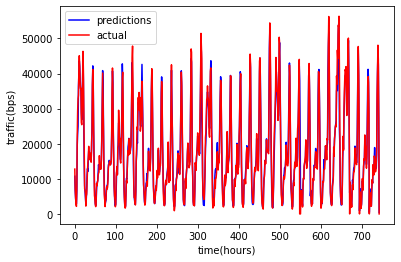

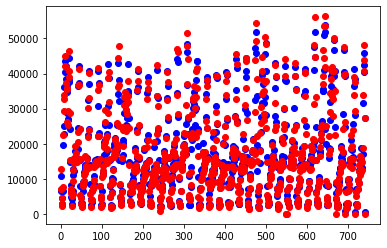

In [99]:
pred = rt.predict(x_test)
a = np.arange(744)
plt.plot(a,pred , color = 'blue',label = 'predictions')
plt.plot(a,y_test , color = 'red',label = 'actual')
plt.xlabel("time(hours)")
plt.ylabel("traffic(bps)")
plt.legend()
plt.show()
plt.scatter(a,pred , color = 'blue',label = 'predictions')
plt.scatter(a,y_test , color = 'red',label = 'actual')

In [46]:
x_4 = dat[0:2424,1:]
y_4 = data[0:2424]
print(x_4)
#print(y)

[[2017 10 23 0]
 [2017 10 23 1]
 [2017 10 23 2]
 ...
 [2018 1 31 21]
 [2018 1 31 22]
 [2018 1 31 23]]


In [47]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt.fit(x_4,y_4)
print(rt.score(x_4,y_4)*100)

<ipython-input-47-fe7a81685ed9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt.fit(x_4,y_4)


98.34287773167215


In [48]:
x_test = dat[2424:3096,1:]
y_test = data[2424:3096]
print(x_test)

[[2018 2 1 0]
 [2018 2 1 1]
 [2018 2 1 2]
 ...
 [2018 2 28 21]
 [2018 2 28 22]
 [2018 2 28 23]]


In [49]:
print(rt.score(x_test,y_test)*100)

24.0851642931761


In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_4,y_4)
print(lr.score(x_4, y_4)*100)

54.68118707507803


In [53]:
print(lr.score(x_test,y_test)*100)

31.110383452305758
